In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn import preprocessing
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.metrics import accuracy_score,confusion_matrix
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(42)

# Data Cleaning
## Data Type, Transformation, Missing Values, Duplicates

In [ ]:
df_train = pd.read_csv('review_train.csv')
df_test = pd.read_csv('review_test.csv')

In [ ]:
df_train.head()

,Review_id,Author,Title,Review,Rating,Dates,Restaurant,Location,Category
0,9479176454,"Thiben76Singapore, Singapore",Lou..sy,"Food test is nowhere near the hype, roasted ch...",1 star,Reviewed 8 November 2018,Lou Wong Bean Sprout Chicken,Ipoh,Mexican
1,4091810389,Choi Yee C,no table,"nice place to visit everytime go melaka, not s...",4 star,Reviewed 14 June 2016,Jonker 86 QQ Ice,Melaka,Italian
2,8163808786,Renganathan S,Best food in town,I tried linguine bolognaise sauce... It's very...,5 star,Reviewed 13 September 2013,Gianni's Trattoria,JB,Italian
3,5014720440,"NahneeRolla, Missouri",You decide,The moment we were at the front door the resta...,1 star,Reviewed 2 January 2017,Moghul Mahal Restaurant,KL,Mexican
4,6466234202,"vidyamenonKuala Lumpur, Malaysia",Was in the area...,Was around the area and stopped by to have a d...,4 star,Reviewed 14 April 2018,One Serambi Cafe,Shah Alam,Mediterranean


In [ ]:
df_train['Dates'] = df_train['Dates'].str.replace('Reviewed ', '', regex=False)
df_train['Dates'] = pd.to_datetime(df_train['Dates'], errors='coerce', exact=False)

In [ ]:
df_test['Dates'] = df_test['Dates'].str.replace('Reviewed ', '', regex=False)
df_test['Dates'] = pd.to_datetime(df_test['Dates'], errors='coerce', exact=False)

In [ ]:
missing_count = df_train.isnull().sum()
missing_count


Review_id      0
Author        19
Title          0
Review         0
Rating         0
Dates         47
Restaurant     0
Location       0
Category       0
dtype: int64

In [ ]:
missing_count = df_test.isnull().sum()
missing_count

Review_id     0
Author        0
Title         0
Review        0
Dates         4
Restaurant    0
Location      0
Category      0
dtype: int64

In [ ]:
df_train['Rating'] = df_train['Rating'].str.extract('(\d+)').astype(int)

In [ ]:
df_train.loc[df_train['Author'].isnull(), 'Author'] = 'Unknown'

In [ ]:
df_train.dropna(subset=['Dates'], inplace=True)
df_test.dropna(subset=['Dates'], inplace=True)

In [ ]:
duplicates = df_train[df_train.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Review_id, Author, Title, Review, Rating, Dates, Restaurant, Location, Category]
Index: []


In [ ]:
duplicates = df_test[df_test.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [Review_id, Author, Title, Review, Dates, Restaurant, Location, Category]
Index: []


# Task C

In [ ]:
import pandas as pd
import numpy as np
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.lower().strip()
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

df_train['Review'] = df_train['Review'].apply(clean_text)

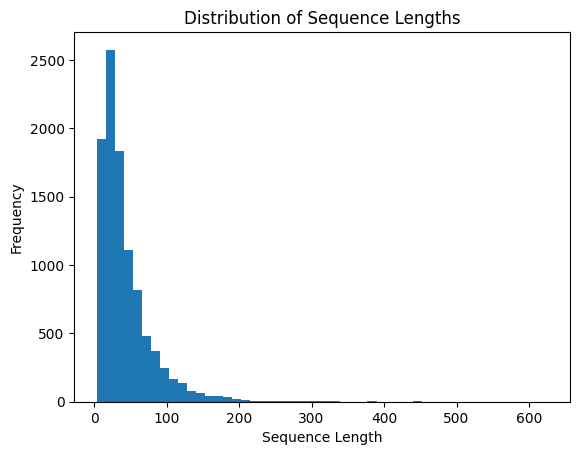

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df_train['Review'])
sequences = tokenizer.texts_to_sequences(df_train['Review'])

# Vocabulary size
vocab_size = len(tokenizer.word_index) + 1

# Sequence length distribution
sequence_lengths = [len(seq) for seq in sequences]
plt.hist(sequence_lengths, bins=50)
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths')
plt.show()

In [ ]:
total_sequences = len(sequence_lengths)

# Sequences longer than 200
sequences_longer_than_200 = [length for length in sequence_lengths if length > 200]
count_longer_than_200 = len(sequences_longer_than_200)

print(f'Total number of sequences: {total_sequences}')
print(f'Number of sequences longer than 200: {count_longer_than_200}')
print(f'Sequences longer than 200: {sequences_longer_than_200}')

Total number of sequences: 10027
Number of sequences longer than 200: 85
Sequences longer than 200: [292, 210, 323, 224, 366, 254, 456, 278, 257, 479, 206, 209, 261, 224, 217, 243, 306, 534, 214, 383, 223, 210, 245, 238, 379, 249, 222, 269, 249, 299, 440, 274, 228, 230, 202, 270, 217, 383, 324, 208, 220, 201, 492, 446, 209, 230, 381, 276, 234, 285, 278, 315, 266, 312, 257, 288, 386, 228, 296, 238, 291, 272, 254, 626, 214, 317, 251, 204, 319, 214, 209, 234, 336, 220, 263, 284, 254, 202, 205, 213, 279, 451, 242, 300, 336]


In [ ]:
max_sequence_length = 200

# Pad sequences to ensure equal length
X = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert ratings to categorical
y = df_train['Rating'] - 1
y = to_categorical(y, num_classes=5)

# Splitting the data into training and validation sets using 80/20
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
def build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(SimpleRNN(units=rnn_units, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = optimizer_type(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stop])

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    # Evaluation
    class_report = classification_report(y_val_classes, y_pred_classes, digits = 3)
    conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

    return history, class_report, conf_matrix

In [ ]:
hyperparams = [
    (128, 0.001, 100, 32, Adam),
    (64, 0.001, 100, 32, Adam),
    (32, 0.001, 100, 32, Adam),
    (256, 0.001, 100, 32, Adam),
    (128, 0.0001, 100, 32, Adam),
    (128, 0.00001, 100, 32, Adam),
    (128, 0.001, 200, 32, Adam),
    (128, 0.001, 50, 32, Adam),
    (128, 0.001, 300, 32, Adam),
    (128, 0.001, 100, 16, Adam,),
    (128, 0.001, 100, 64, Adam),
    (128, 0.001, 100, 32, RMSprop),
    (128, 0.001, 100, 32, SGD)
]

In [ ]:
from keras.layers import Embedding, SimpleRNN, Dropout, Dense
from tensorflow.keras.callbacks import EarlyStopping
results = []
for rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type in hyperparams:
    history, class_report, conf_matrix = build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type)
    results.append((history, class_report, conf_matrix, f'{rnn_units} units, lr={learning_rate}, emb_dim={embedding_dim}, batch={batch_size}, opt={optimizer_type.__name__}'))

Epoch 1/100
251/251 - 39s - loss: 1.4812 - accuracy: 0.2980 - val_loss: 1.2857 - val_accuracy: 0.3948 - 39s/epoch - 154ms/step
Epoch 2/100
251/251 - 35s - loss: 1.1802 - accuracy: 0.4451 - val_loss: 1.2052 - val_accuracy: 0.4347 - 35s/epoch - 139ms/step
Epoch 3/100
251/251 - 29s - loss: 0.9458 - accuracy: 0.5795 - val_loss: 1.2426 - val_accuracy: 0.4422 - 29s/epoch - 117ms/step
Epoch 4/100
251/251 - 31s - loss: 0.7469 - accuracy: 0.6923 - val_loss: 1.4113 - val_accuracy: 0.4232 - 31s/epoch - 122ms/step
Epoch 5/100
251/251 - 30s - loss: 0.5776 - accuracy: 0.7802 - val_loss: 1.5317 - val_accuracy: 0.4197 - 30s/epoch - 118ms/step
Epoch 6/100
251/251 - 30s - loss: 0.3918 - accuracy: 0.8619 - val_loss: 1.7614 - val_accuracy: 0.4262 - 30s/epoch - 118ms/step
Epoch 7/100
251/251 - 31s - loss: 0.2700 - accuracy: 0.9086 - val_loss: 2.0589 - val_accuracy: 0.4352 - 31s/epoch - 125ms/step
Epoch 8/100
251/251 - 30s - loss: 0.1829 - accuracy: 0.9420 - val_loss: 2.1227 - val_accuracy: 0.4287 - 30s/epo

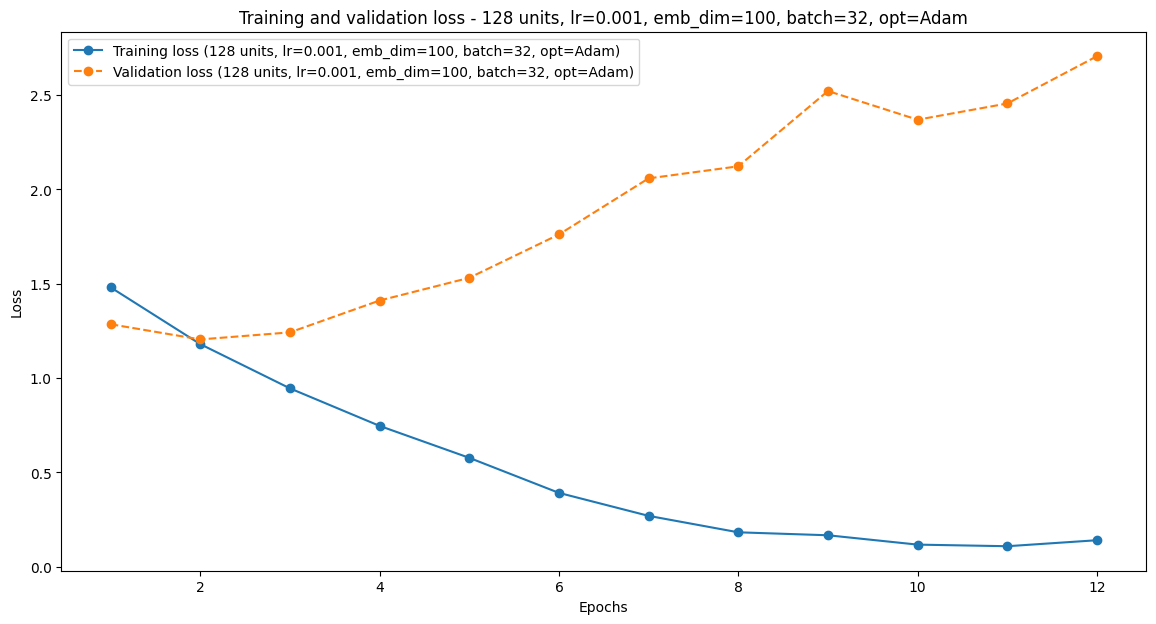

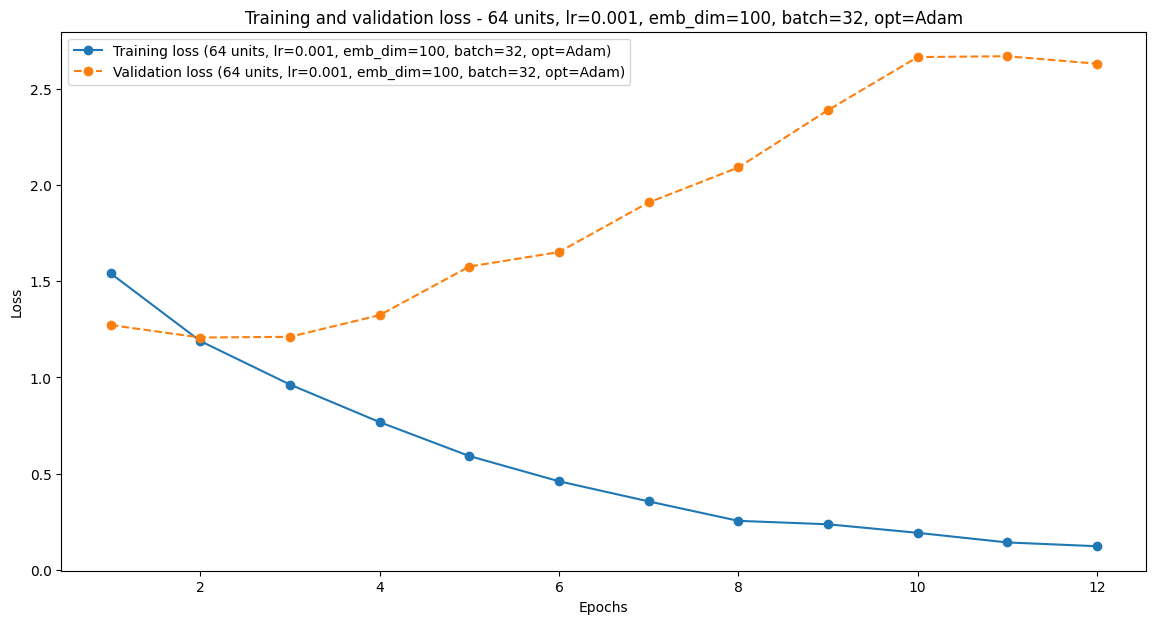

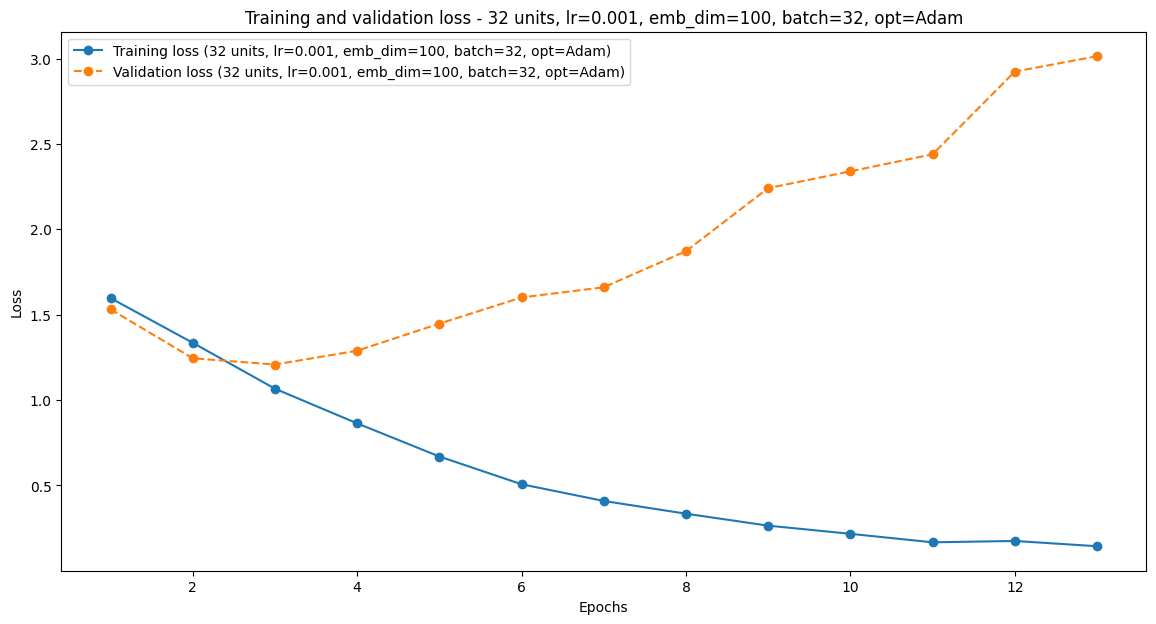

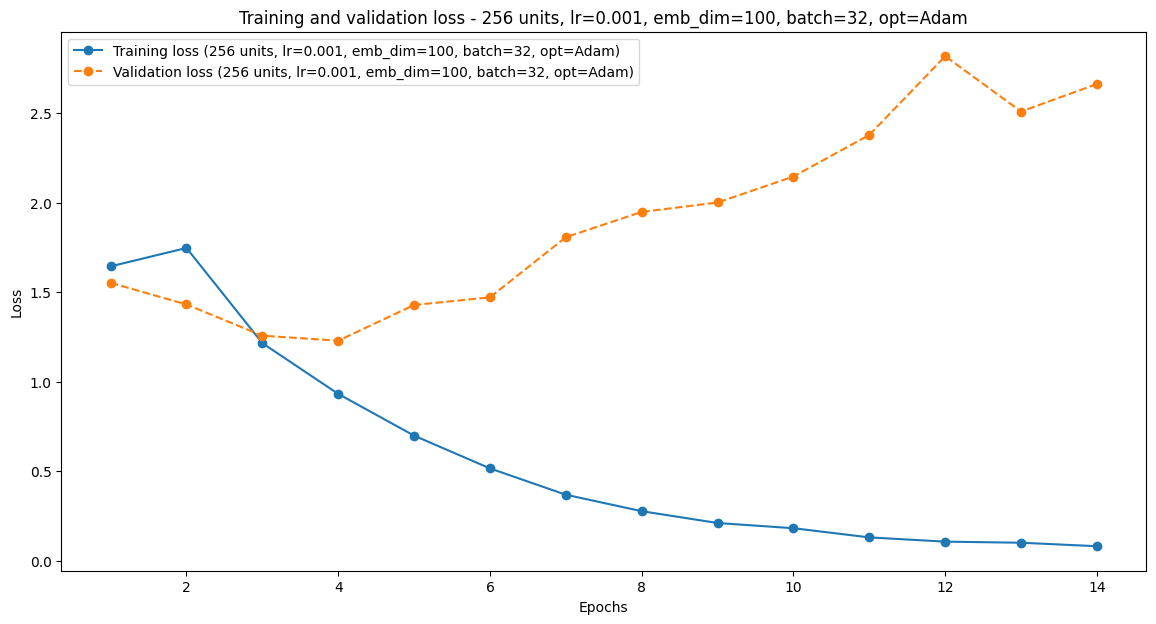

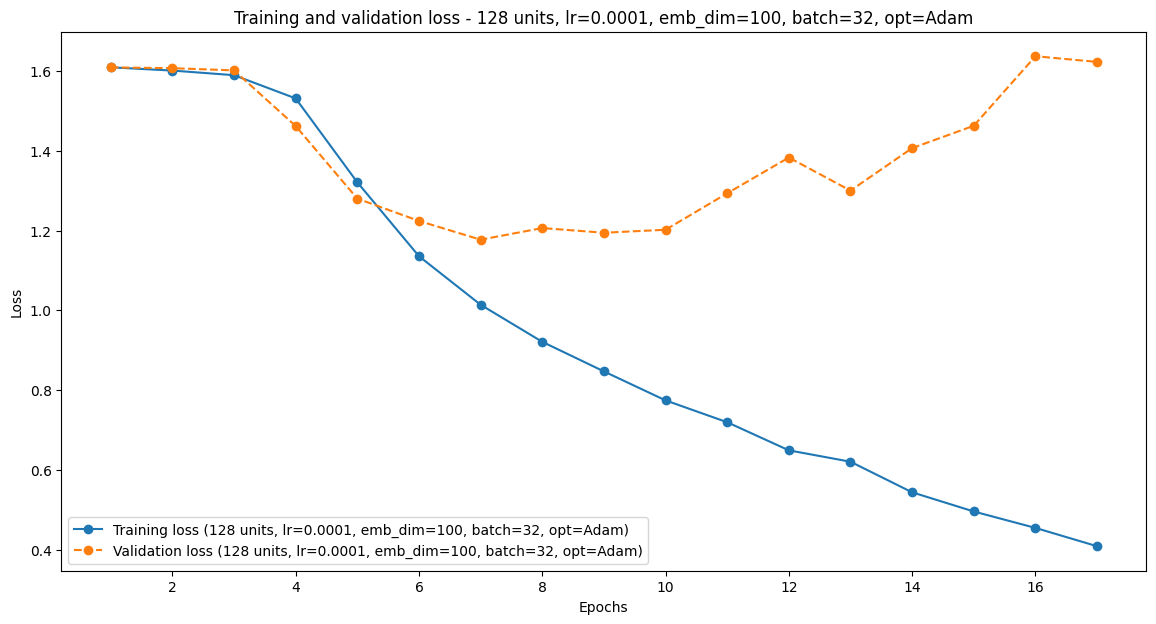

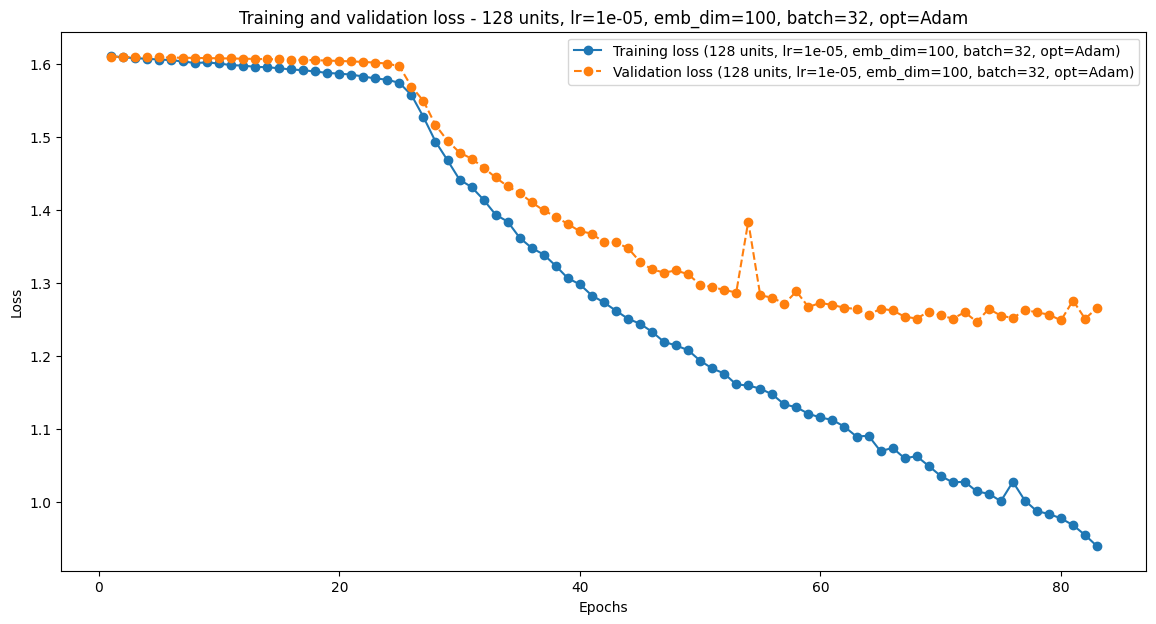

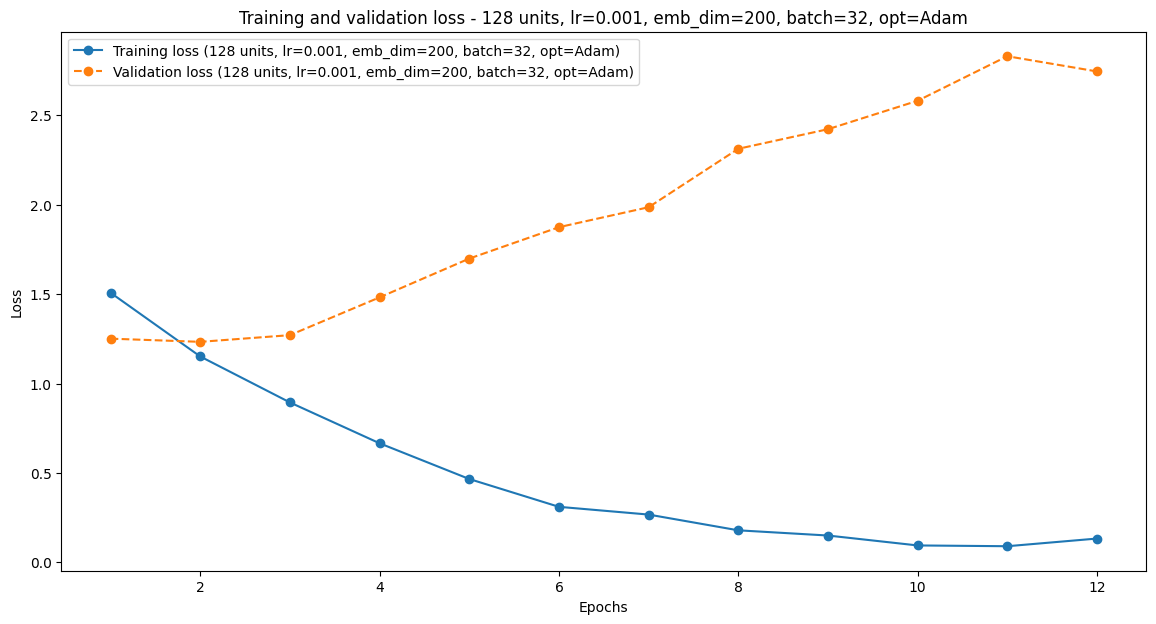

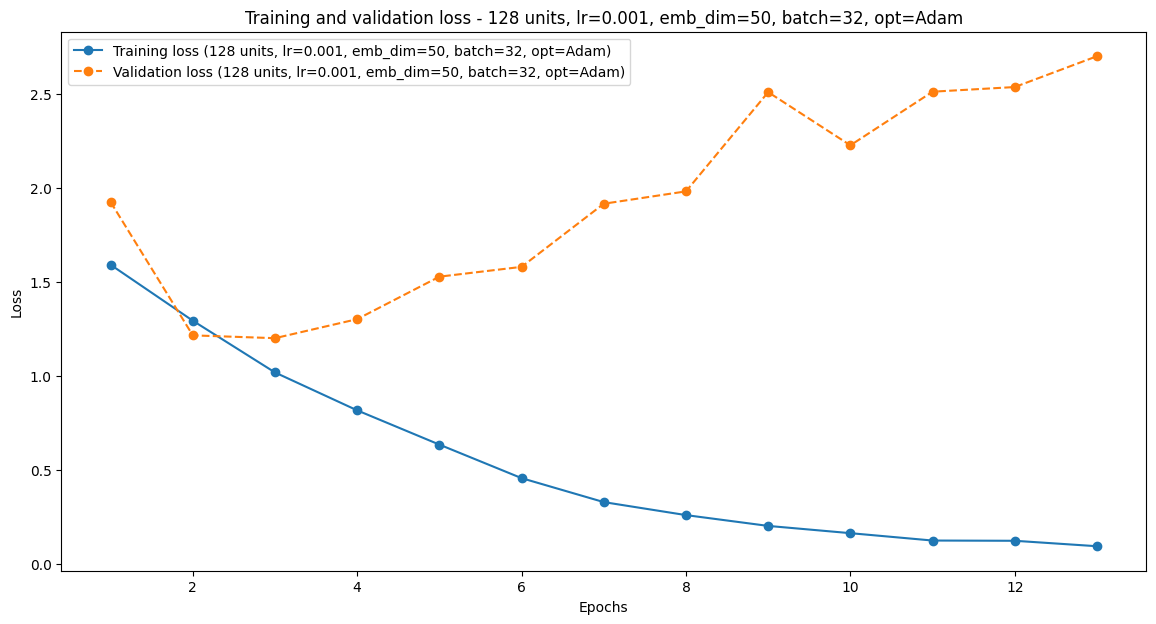

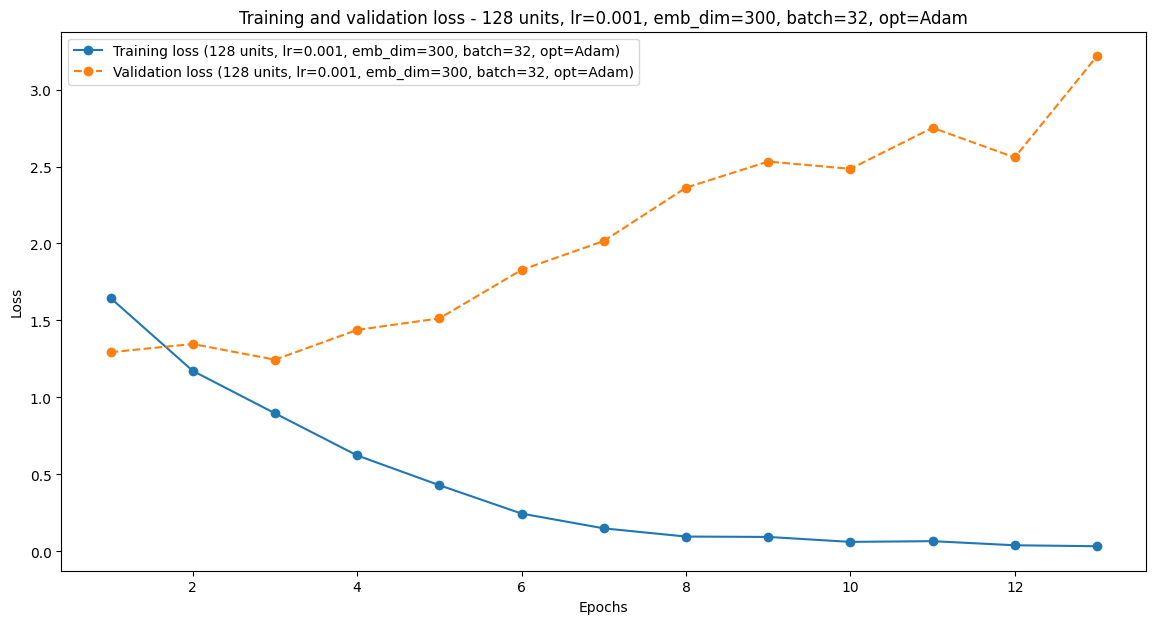

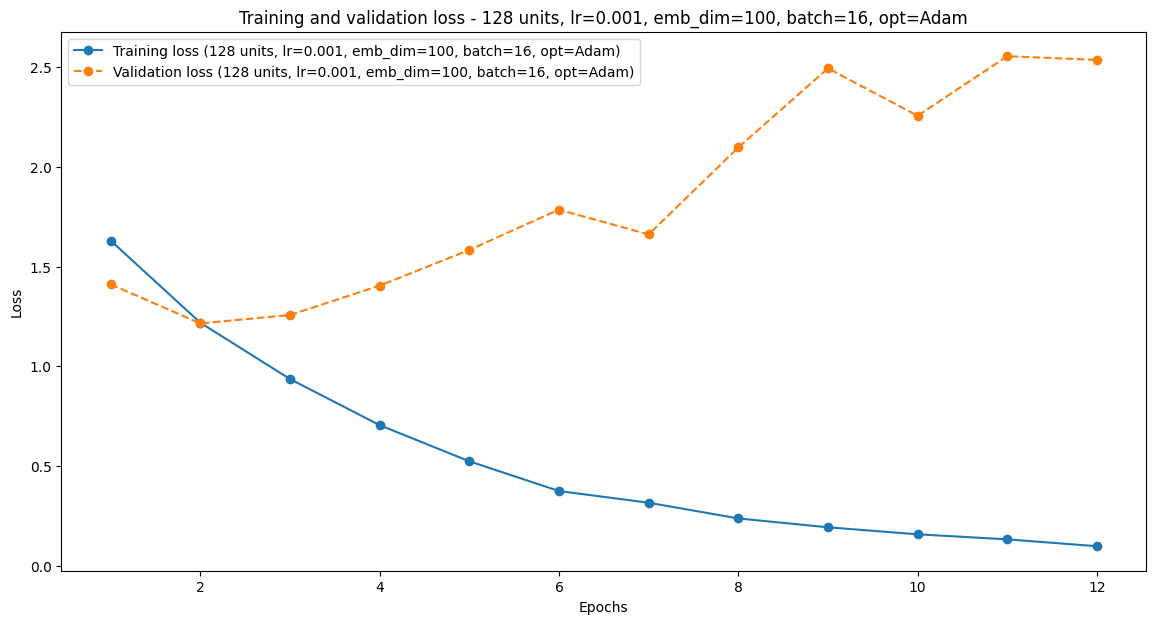

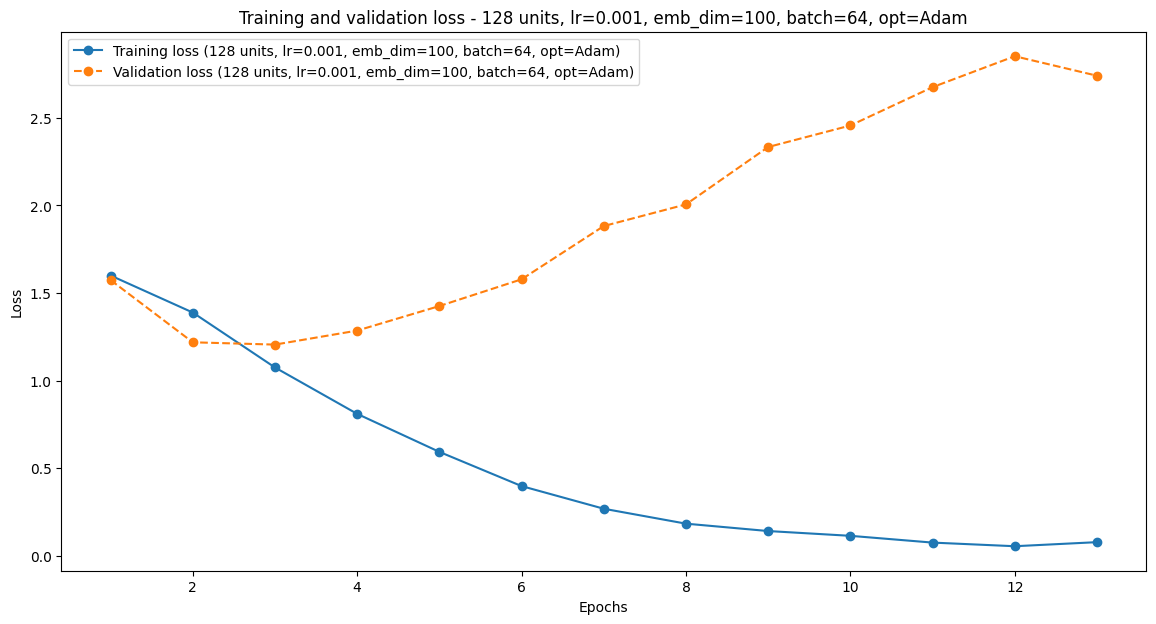

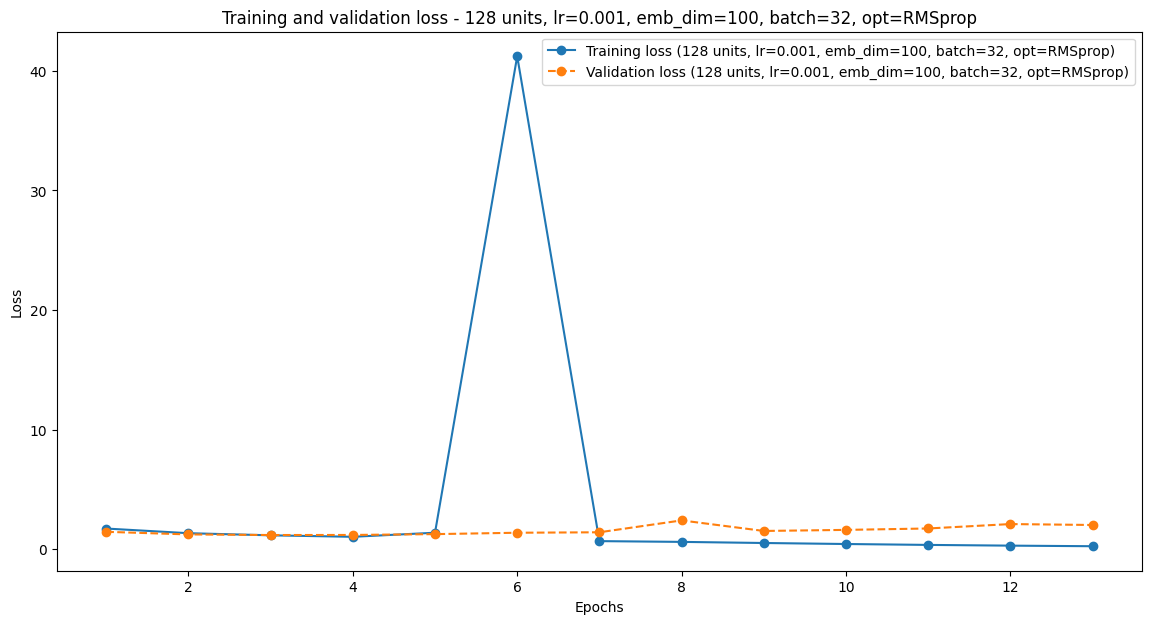

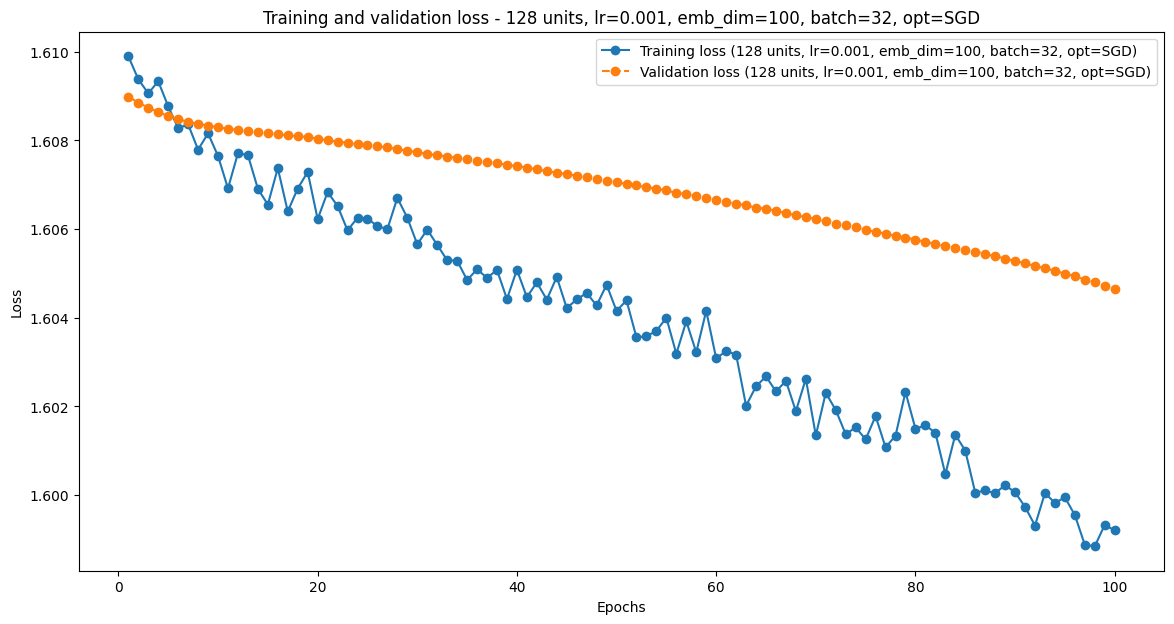

Hyperparameters: 128 units, lr=0.001, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.81      0.55       386
           1       0.41      0.21      0.28       430
           2       0.43      0.23      0.30       400
           3       0.39      0.17      0.23       399
           4       0.48      0.79      0.60       391

    accuracy                           0.43      2006
   macro avg       0.42      0.44      0.39      2006
weighted avg       0.42      0.43      0.39      2006

Confusion Matrix:
313.000 38.000 23.000 4.000 8.000
271.000 92.000 31.000 18.000 18.000
129.000 59.000 92.000 49.000 71.000
22.000 24.000 47.000 66.000 240.000
13.000 12.000 23.000 34.000 309.000


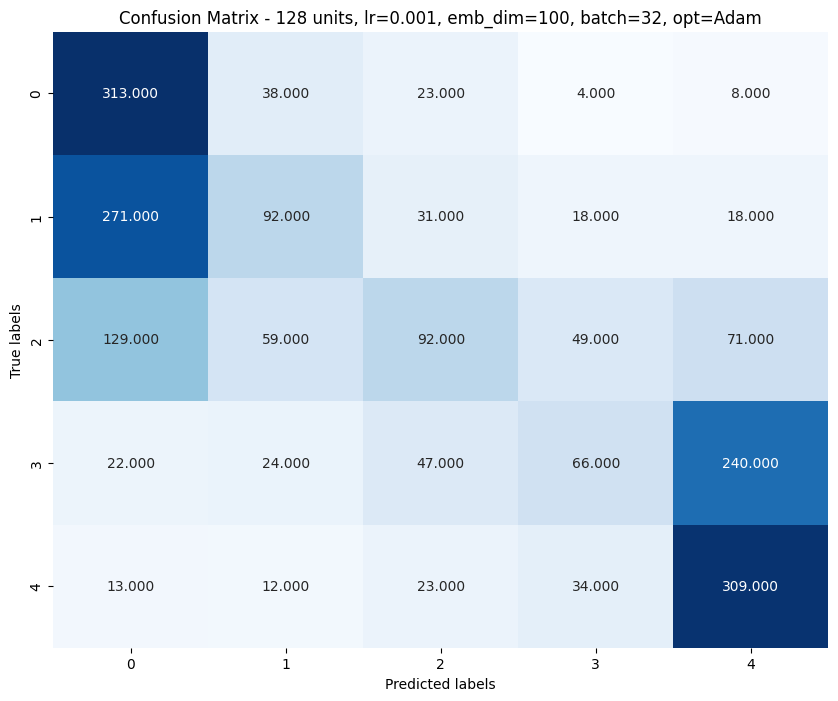

Hyperparameters: 64 units, lr=0.001, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.70      0.60       386
           1       0.45      0.21      0.28       430
           2       0.40      0.30      0.35       400
           3       0.28      0.18      0.22       399
           4       0.44      0.82      0.57       391

    accuracy                           0.44      2006
   macro avg       0.42      0.44      0.40      2006
weighted avg       0.42      0.44      0.40      2006

Confusion Matrix:
270.000 47.000 37.000 16.000 16.000
178.000 89.000 93.000 38.000 32.000
54.000 50.000 122.000 79.000 95.000
9.000 8.000 41.000 70.000 271.000
7.000 2.000 13.000 47.000 322.000


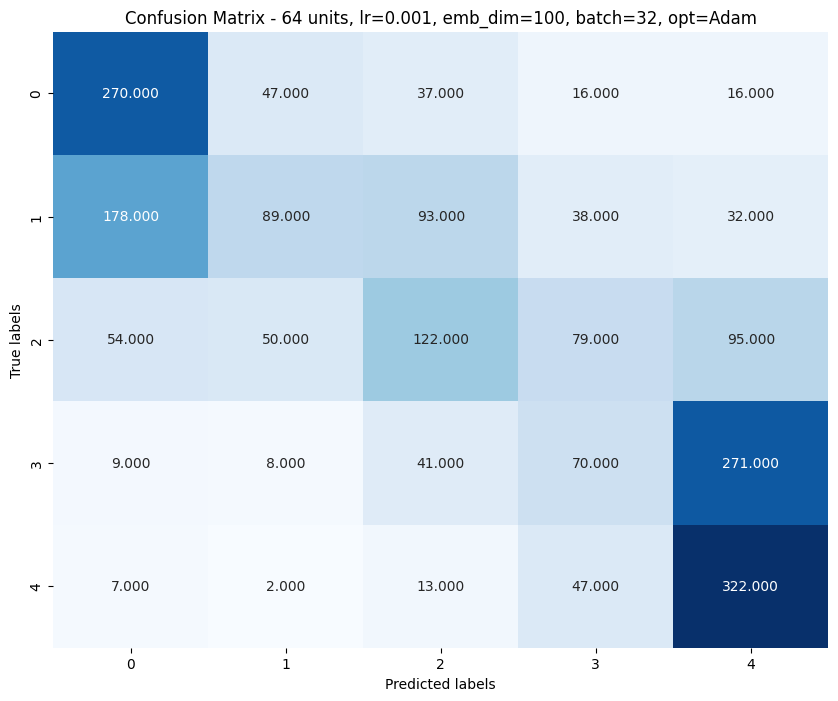

Hyperparameters: 32 units, lr=0.001, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.47      0.45       386
           1       0.40      0.33      0.36       430
           2       0.34      0.36      0.35       400
           3       0.42      0.31      0.36       399
           4       0.53      0.69      0.60       391

    accuracy                           0.43      2006
   macro avg       0.42      0.43      0.42      2006
weighted avg       0.42      0.43      0.42      2006

Confusion Matrix:
180.000 123.000 70.000 8.000 5.000
146.000 143.000 109.000 20.000 12.000
66.000 75.000 144.000 67.000 48.000
12.000 13.000 70.000 124.000 180.000
13.000 5.000 25.000 77.000 271.000


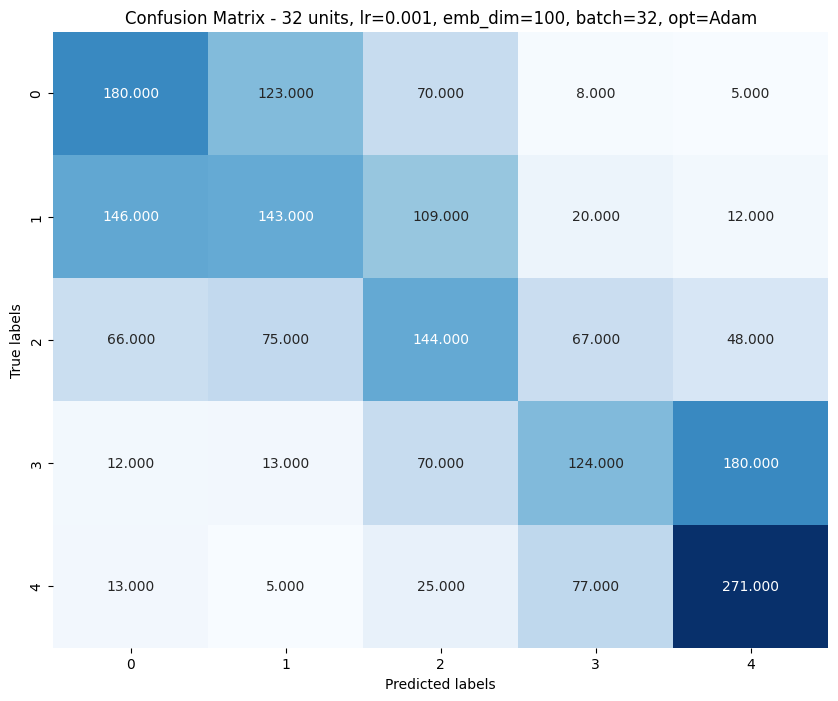

Hyperparameters: 256 units, lr=0.001, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.48      0.52       386
           1       0.42      0.33      0.37       430
           2       0.36      0.59      0.45       400
           3       0.42      0.41      0.42       399
           4       0.62      0.46      0.53       391

    accuracy                           0.45      2006
   macro avg       0.48      0.46      0.46      2006
weighted avg       0.48      0.45      0.45      2006

Confusion Matrix:
186.000 119.000 64.000 14.000 3.000
108.000 141.000 163.000 16.000 2.000
23.000 60.000 237.000 60.000 20.000
3.000 11.000 133.000 165.000 87.000
5.000 5.000 62.000 138.000 181.000


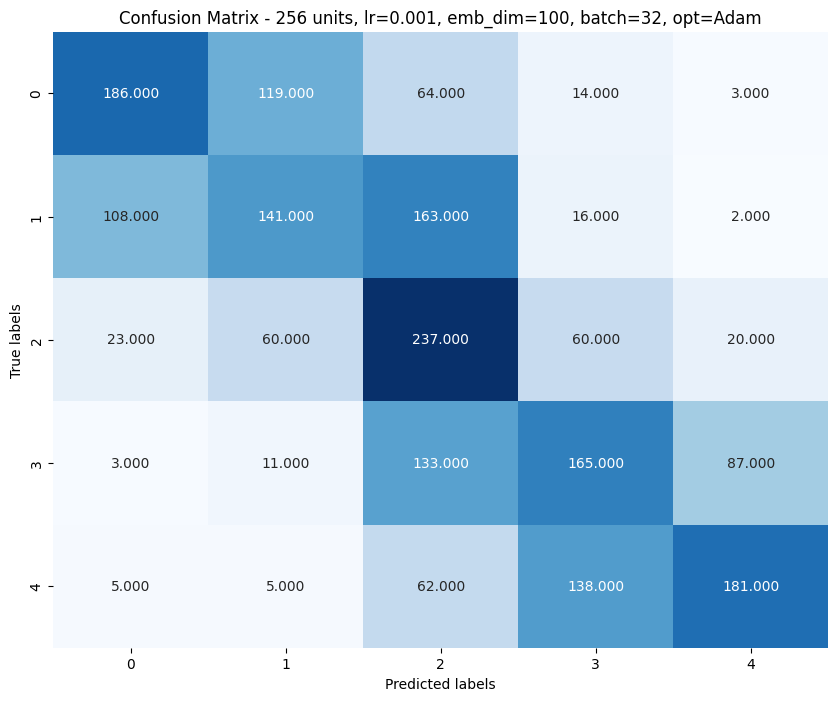

Hyperparameters: 128 units, lr=0.0001, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.72      0.58       386
           1       0.40      0.22      0.28       430
           2       0.41      0.50      0.45       400
           3       0.38      0.21      0.27       399
           4       0.53      0.65      0.59       391

    accuracy                           0.45      2006
   macro avg       0.44      0.46      0.43      2006
weighted avg       0.44      0.45      0.43      2006

Confusion Matrix:
279.000 58.000 41.000 5.000 3.000
223.000 95.000 91.000 13.000 8.000
62.000 60.000 199.000 47.000 32.000
9.000 13.000 114.000 84.000 179.000
9.000 11.000 42.000 75.000 254.000


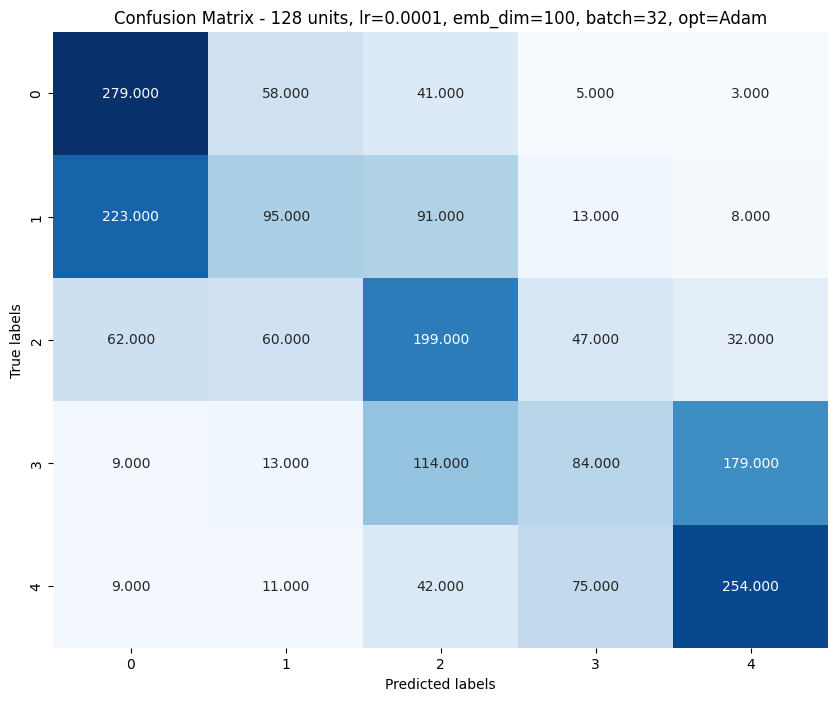

Hyperparameters: 128 units, lr=1e-05, emb_dim=100, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.58      0.53       386
           1       0.38      0.32      0.34       430
           2       0.32      0.30      0.31       400
           3       0.30      0.18      0.22       399
           4       0.45      0.67      0.54       391

    accuracy                           0.40      2006
   macro avg       0.39      0.41      0.39      2006
weighted avg       0.39      0.40      0.39      2006

Confusion Matrix:
223.000 108.000 45.000 5.000 5.000
172.000 136.000 86.000 19.000 17.000
48.000 91.000 120.000 69.000 72.000
6.000 16.000 78.000 71.000 228.000
2.000 11.000 45.000 71.000 262.000


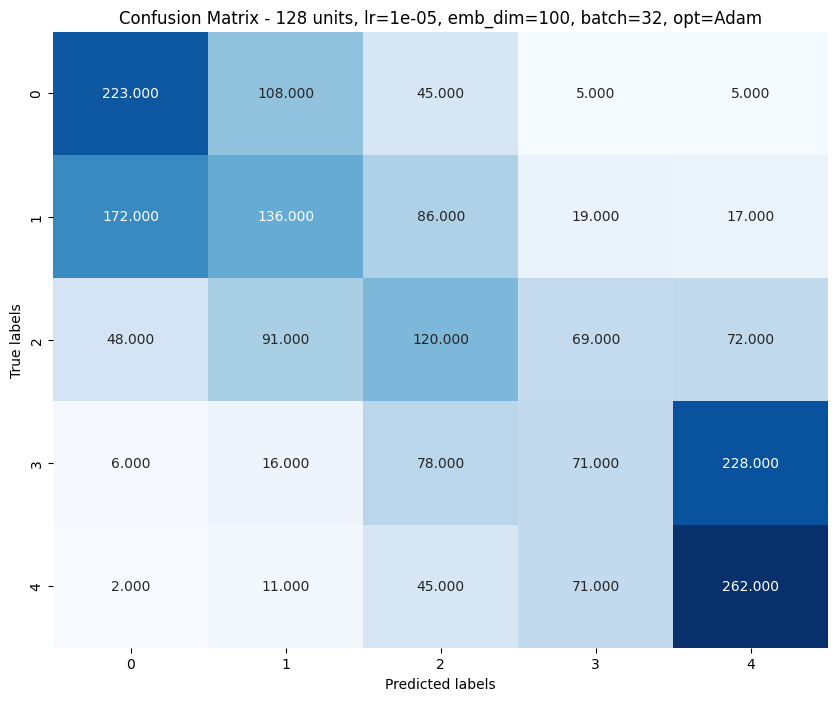

Hyperparameters: 128 units, lr=0.001, emb_dim=200, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.46      0.48       386
           1       0.41      0.39      0.40       430
           2       0.36      0.33      0.34       400
           3       0.36      0.20      0.25       399
           4       0.46      0.78      0.58       391

    accuracy                           0.43      2006
   macro avg       0.42      0.43      0.41      2006
weighted avg       0.42      0.43      0.41      2006

Confusion Matrix:
176.000 137.000 51.000 9.000 13.000
109.000 166.000 105.000 23.000 27.000
45.000 79.000 133.000 61.000 82.000
9.000 17.000 57.000 78.000 238.000
2.000 8.000 28.000 47.000 306.000


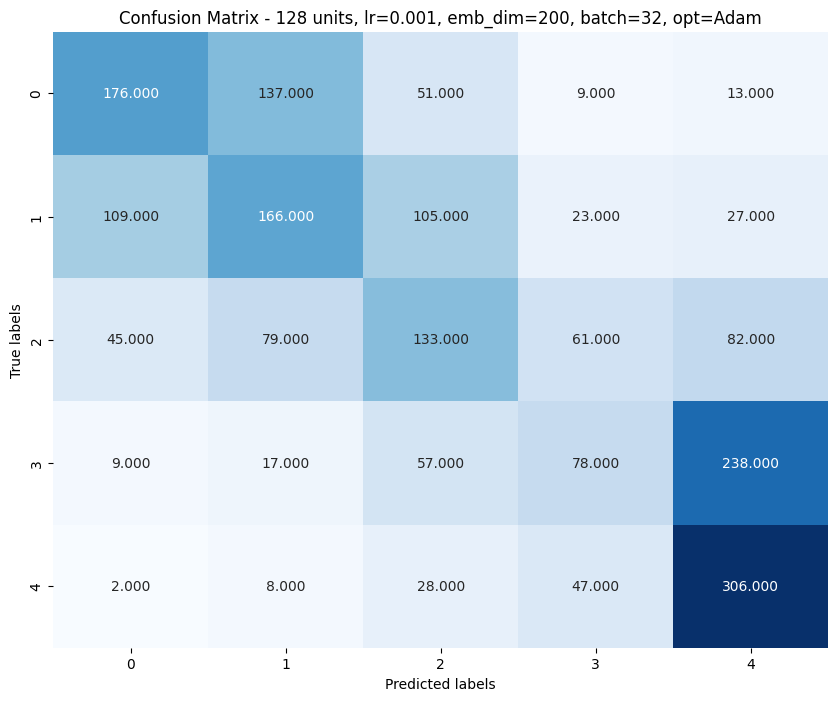

Hyperparameters: 128 units, lr=0.001, emb_dim=50, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.64      0.56       386
           1       0.44      0.33      0.38       430
           2       0.40      0.34      0.37       400
           3       0.38      0.32      0.34       399
           4       0.53      0.66      0.59       391

    accuracy                           0.46      2006
   macro avg       0.45      0.46      0.45      2006
weighted avg       0.44      0.46      0.44      2006

Confusion Matrix:
248.000 90.000 28.000 14.000 6.000
171.000 143.000 80.000 27.000 9.000
70.000 72.000 136.000 81.000 41.000
9.000 12.000 75.000 127.000 176.000
6.000 11.000 25.000 89.000 260.000


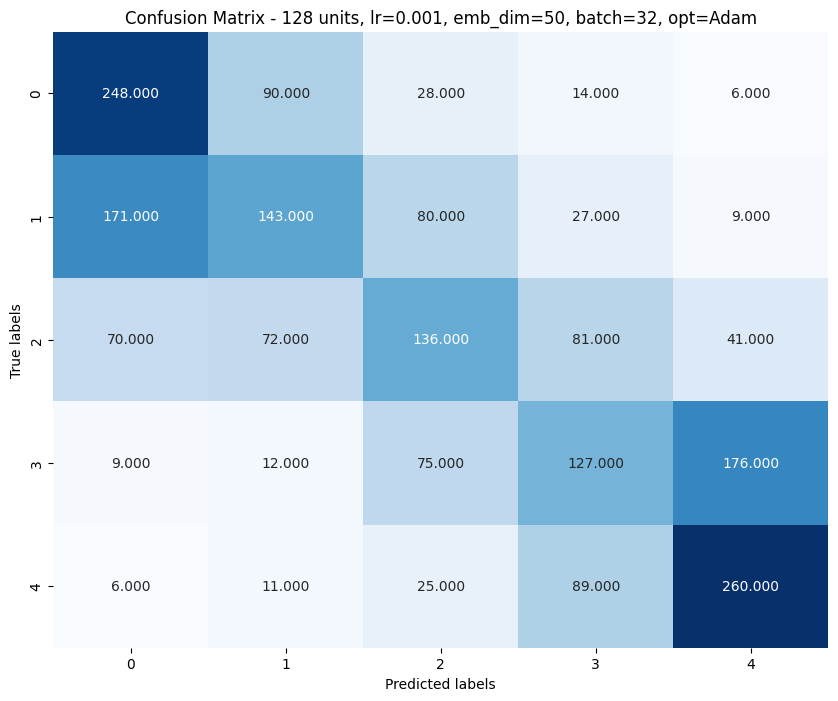

Hyperparameters: 128 units, lr=0.001, emb_dim=300, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       386
           1       0.40      0.40      0.40       430
           2       0.37      0.29      0.33       400
           3       0.40      0.33      0.36       399
           4       0.51      0.66      0.57       391

    accuracy                           0.44      2006
   macro avg       0.43      0.44      0.43      2006
weighted avg       0.43      0.44      0.43      2006

Confusion Matrix:
204.000 125.000 34.000 15.000 8.000
146.000 174.000 71.000 25.000 14.000
64.000 90.000 117.000 75.000 54.000
11.000 28.000 60.000 130.000 170.000
6.000 13.000 31.000 84.000 257.000


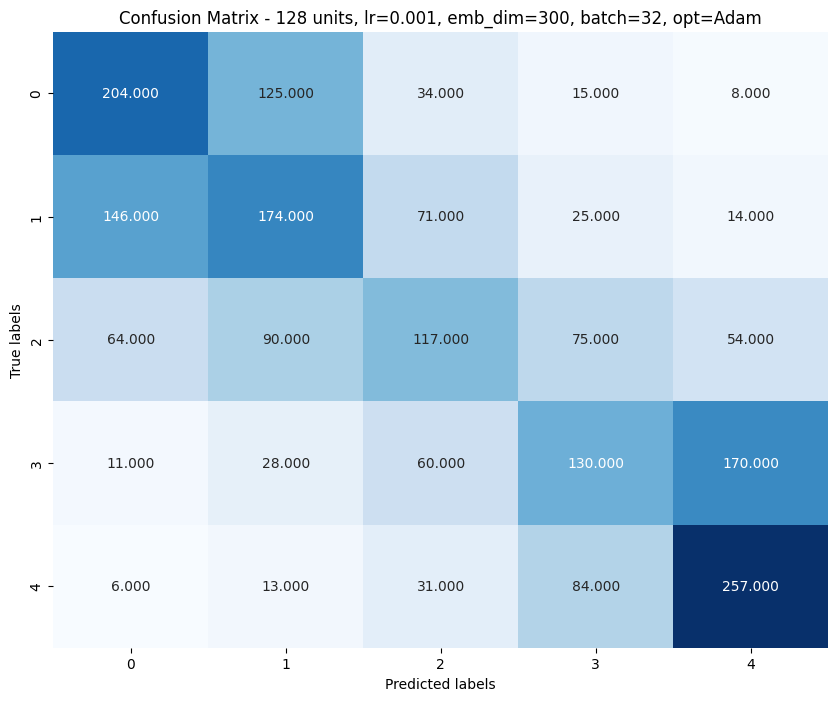

Hyperparameters: 128 units, lr=0.001, emb_dim=100, batch=16, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.71      0.55       386
           1       0.36      0.30      0.33       430
           2       0.36      0.31      0.33       400
           3       0.46      0.34      0.39       399
           4       0.56      0.58      0.57       391

    accuracy                           0.44      2006
   macro avg       0.44      0.45      0.43      2006
weighted avg       0.43      0.44      0.43      2006

Confusion Matrix:
273.000 73.000 27.000 8.000 5.000
213.000 128.000 69.000 12.000 8.000
91.000 103.000 124.000 46.000 36.000
17.000 32.000 84.000 135.000 131.000
11.000 20.000 42.000 93.000 225.000


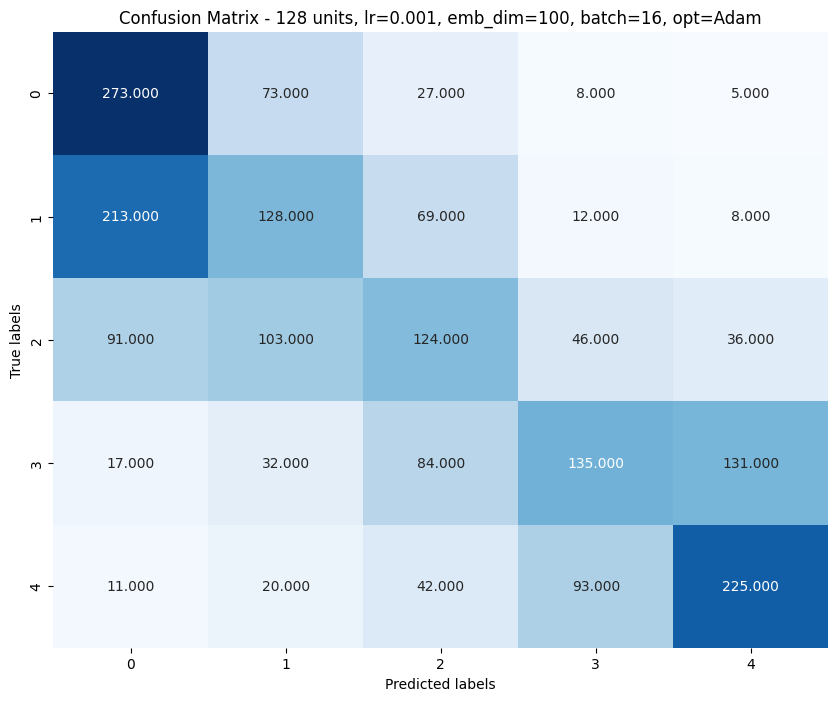

Hyperparameters: 128 units, lr=0.001, emb_dim=100, batch=64, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.40      0.46       386
           1       0.40      0.47      0.43       430
           2       0.36      0.41      0.38       400
           3       0.39      0.32      0.35       399
           4       0.54      0.59      0.56       391

    accuracy                           0.44      2006
   macro avg       0.44      0.44      0.44      2006
weighted avg       0.44      0.44      0.44      2006

Confusion Matrix:
156.000 162.000 47.000 14.000 7.000
92.000 203.000 103.000 28.000 4.000
25.000 112.000 163.000 61.000 39.000
6.000 24.000 93.000 127.000 149.000
9.000 10.000 44.000 99.000 229.000


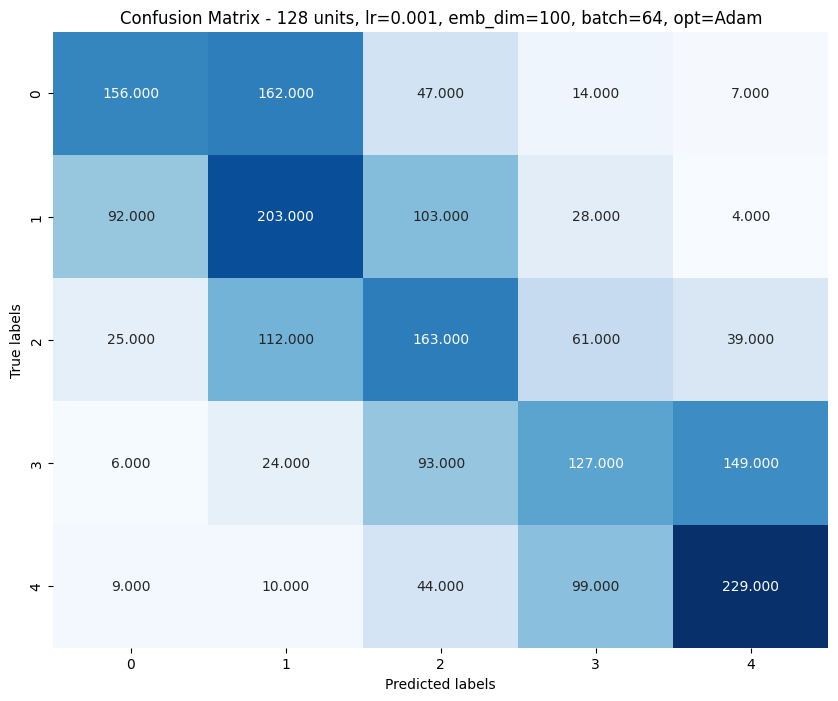

Hyperparameters: 128 units, lr=0.001, emb_dim=100, batch=32, opt=RMSprop
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.68      0.59       386
           1       0.42      0.29      0.34       430
           2       0.38      0.34      0.36       400
           3       0.40      0.53      0.46       399
           4       0.60      0.50      0.54       391

    accuracy                           0.46      2006
   macro avg       0.46      0.47      0.46      2006
weighted avg       0.46      0.46      0.45      2006

Confusion Matrix:
264.000 66.000 41.000 12.000 3.000
188.000 123.000 75.000 37.000 7.000
41.000 86.000 135.000 118.000 20.000
6.000 12.000 68.000 212.000 101.000
4.000 9.000 34.000 150.000 194.000


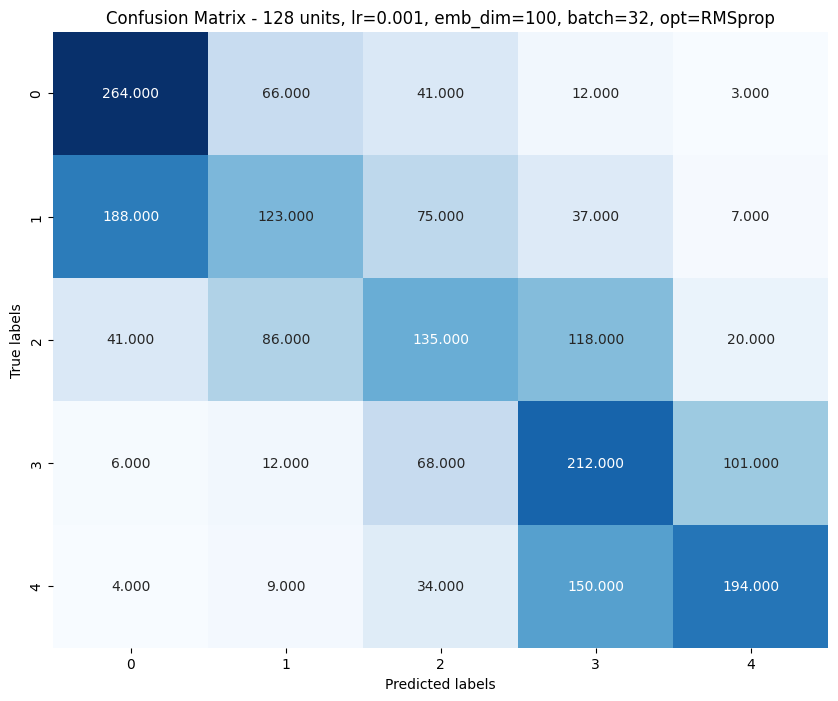

Hyperparameters: 128 units, lr=0.001, emb_dim=100, batch=32, opt=SGD
Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.11      0.16       386
           1       0.21      0.90      0.35       430
           2       0.10      0.01      0.01       400
           3       0.43      0.01      0.01       399
           4       0.57      0.03      0.06       391

    accuracy                           0.22      2006
   macro avg       0.32      0.21      0.12      2006
weighted avg       0.31      0.22      0.12      2006

Confusion Matrix:
42.000 338.000 4.000 0.000 2.000
33.000 387.000 5.000 3.000 2.000
29.000 367.000 2.000 0.000 2.000
24.000 360.000 8.000 3.000 4.000
23.000 353.000 1.000 1.000 13.000


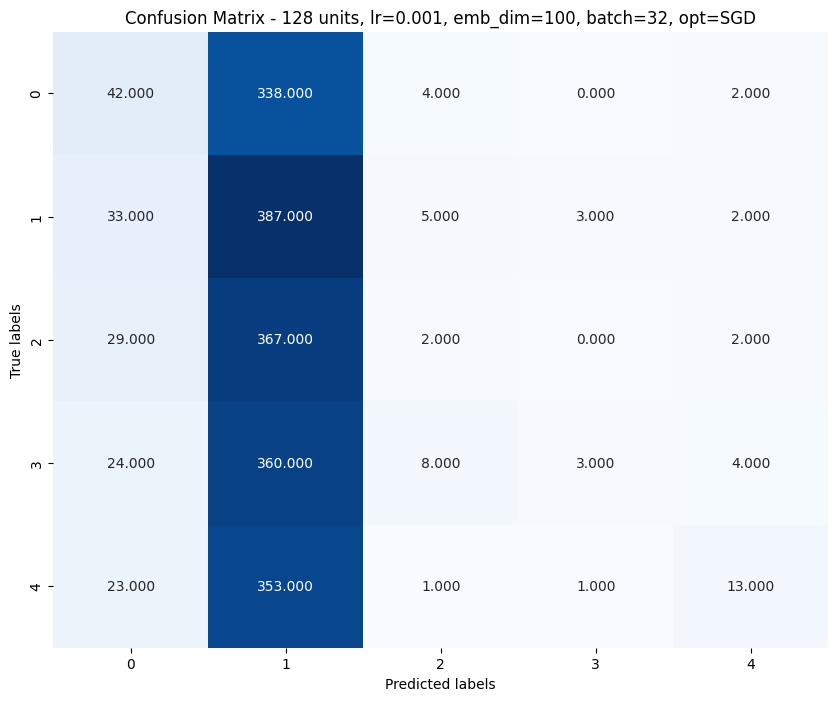

In [ ]:
def plot_model_performance_separate(histories, labels):
    for history, label in zip(histories, labels):
        plt.figure(figsize=(14, 7))

        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'o-', label=f'Training loss ({label})')
        plt.plot(epochs, val_loss, 'o--', label=f'Validation loss ({label})')

        plt.title(f'Training and validation loss - {label}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

plot_model_performance_separate(
    histories=[result[0] for result in results],
    labels=[result[3] for result in results]
)

for history, class_report, conf_matrix, label in results:
    print(f'Hyperparameters: {label}')
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='.3f', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {label}')
    plt.show()

# More Tuning

In [ ]:
def build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_sequence_length))
    model.add(SimpleRNN(units=rnn_units, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = optimizer_type(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stop])

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    # Evaluation
    class_report = classification_report(y_val_classes, y_pred_classes, digits = 3)
    conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

    return history, class_report, conf_matrix

In [ ]:
hyperparams = [
    (256, 0.0001, 300, 32, Adam),
    (256, 0.0001, 50, 32, Adam),
    (256, 0.0001, 300, 32, RMSprop),
    (256, 0.0001, 50, 32, RMSprop)
]

In [ ]:
results = []
for rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type in hyperparams:
    history, class_report, conf_matrix = build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type)
    results.append((history, class_report, conf_matrix, f'{rnn_units} units, lr={learning_rate}, emb_dim={embedding_dim}, batch={batch_size}, opt={optimizer_type.__name__}'))

Epoch 1/100
251/251 - 144s - loss: 1.6088 - accuracy: 0.2097 - val_loss: 1.6060 - val_accuracy: 0.2328 - 144s/epoch - 576ms/step
Epoch 2/100
251/251 - 115s - loss: 1.5901 - accuracy: 0.3064 - val_loss: 1.5981 - val_accuracy: 0.2483 - 115s/epoch - 458ms/step
Epoch 3/100
251/251 - 117s - loss: 1.5314 - accuracy: 0.3715 - val_loss: 1.4214 - val_accuracy: 0.3669 - 117s/epoch - 467ms/step
Epoch 4/100
251/251 - 122s - loss: 1.2580 - accuracy: 0.4488 - val_loss: 1.2055 - val_accuracy: 0.4262 - 122s/epoch - 485ms/step
Epoch 5/100
251/251 - 114s - loss: 1.0620 - accuracy: 0.5219 - val_loss: 1.1491 - val_accuracy: 0.4536 - 114s/epoch - 455ms/step
Epoch 6/100
251/251 - 114s - loss: 0.9195 - accuracy: 0.6023 - val_loss: 1.1645 - val_accuracy: 0.4806 - 114s/epoch - 456ms/step
Epoch 7/100
251/251 - 122s - loss: 0.7938 - accuracy: 0.6790 - val_loss: 1.1843 - val_accuracy: 0.4796 - 122s/epoch - 486ms/step
Epoch 8/100
251/251 - 114s - loss: 0.6677 - accuracy: 0.7416 - val_loss: 1.2426 - val_accuracy: 0

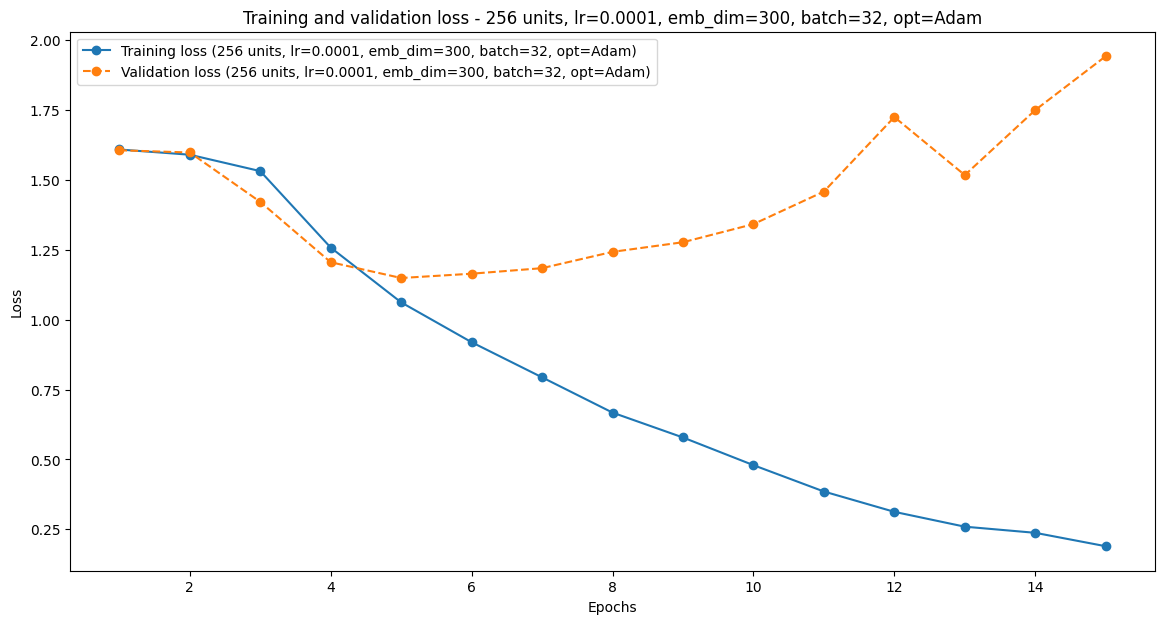

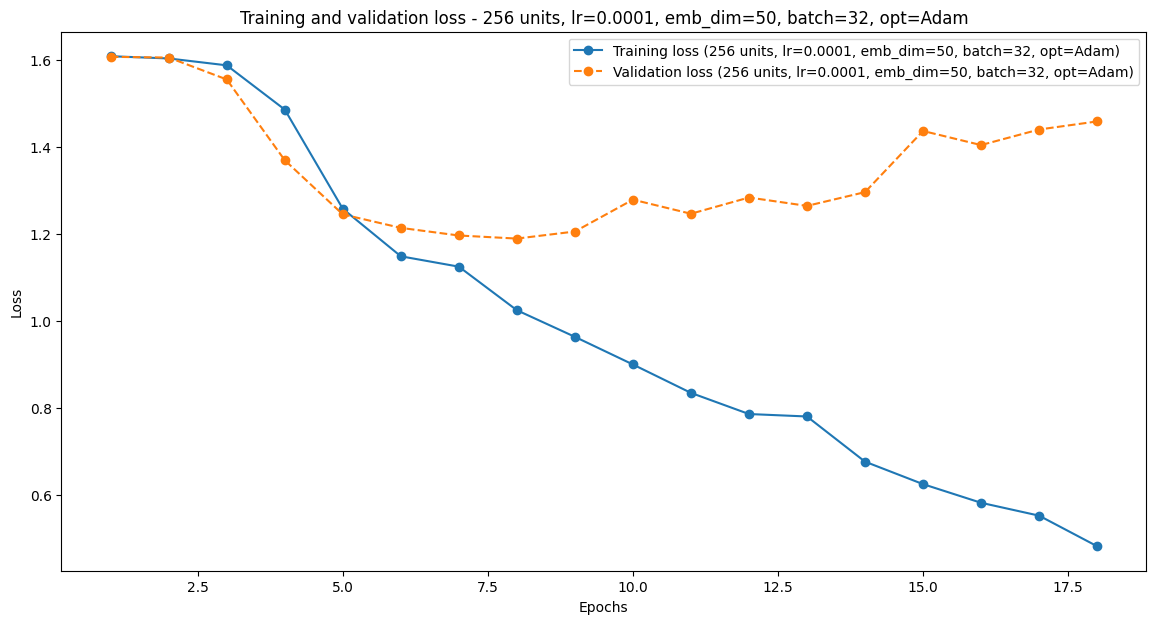

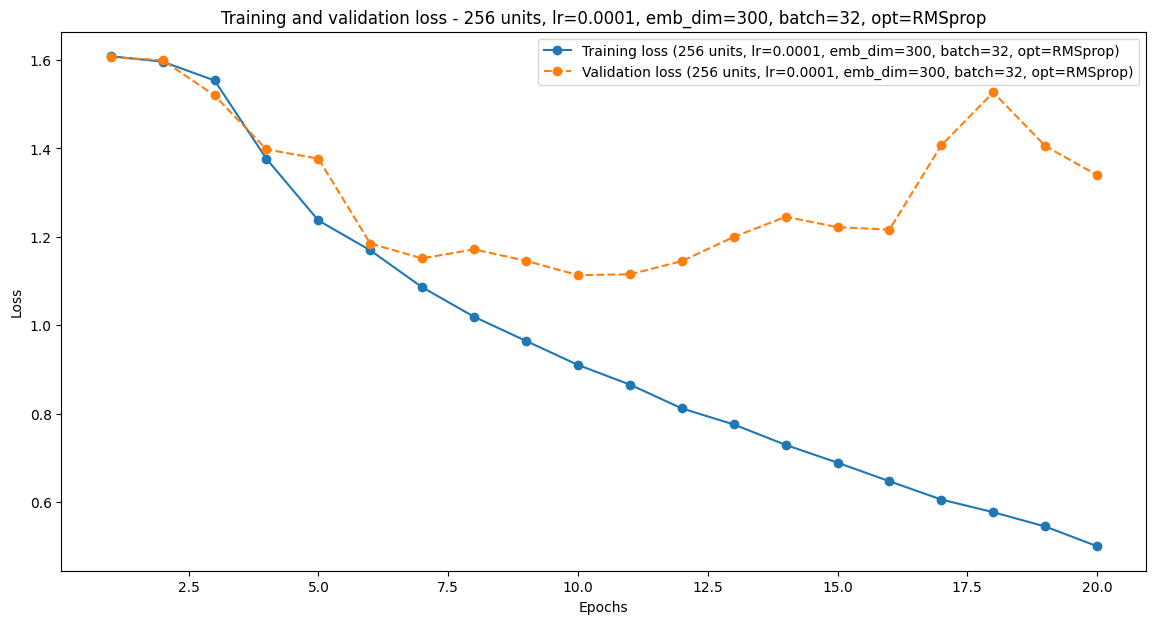

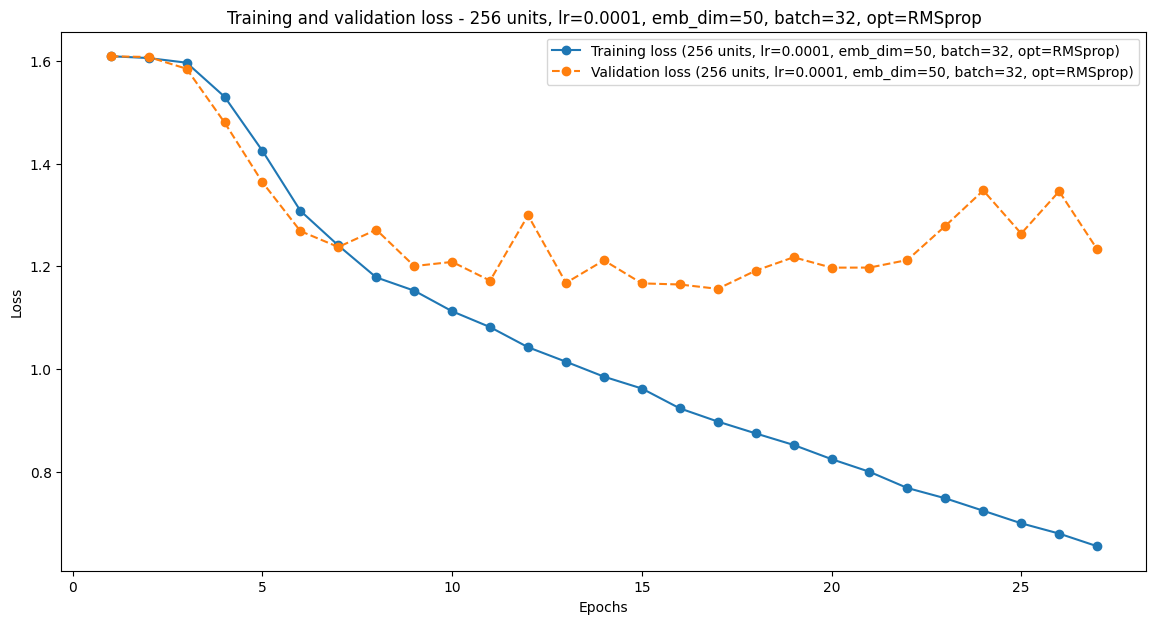

Hyperparameters: 256 units, lr=0.0001, emb_dim=300, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0      0.560     0.627     0.592       386
           1      0.427     0.321     0.367       430
           2      0.392     0.385     0.388       400
           3      0.331     0.241     0.279       399
           4      0.493     0.716     0.584       391

    accuracy                          0.454      2006
   macro avg      0.441     0.458     0.442      2006
weighted avg      0.439     0.454     0.439      2006

Confusion Matrix:


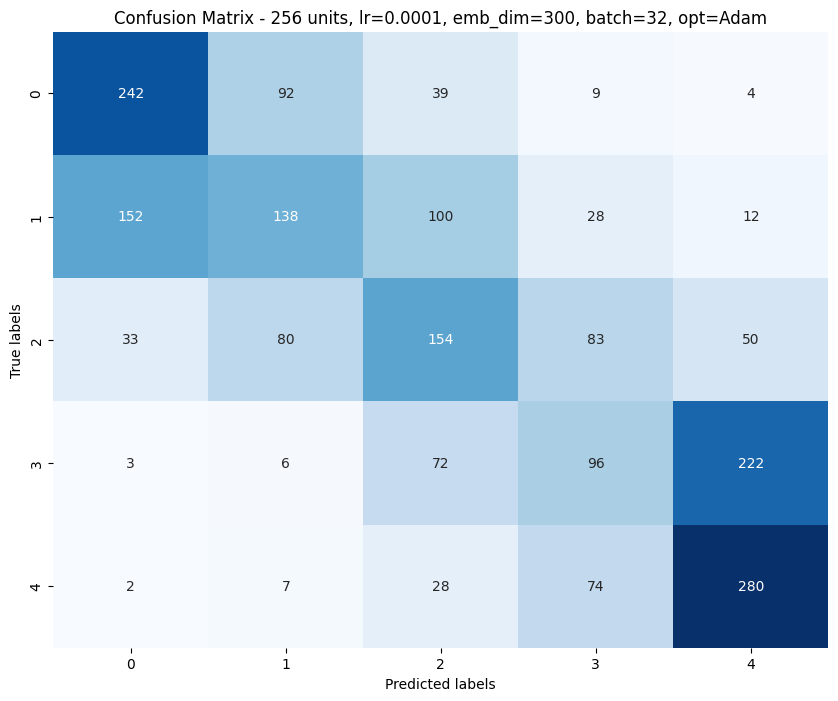

Hyperparameters: 256 units, lr=0.0001, emb_dim=50, batch=32, opt=Adam
Classification Report:
              precision    recall  f1-score   support

           0      0.511     0.676     0.582       386
           1      0.417     0.293     0.344       430
           2      0.345     0.352     0.349       400
           3      0.339     0.198     0.250       399
           4      0.488     0.688     0.571       391

    accuracy                          0.437      2006
   macro avg      0.420     0.442     0.419      2006
weighted avg      0.419     0.437     0.416      2006

Confusion Matrix:


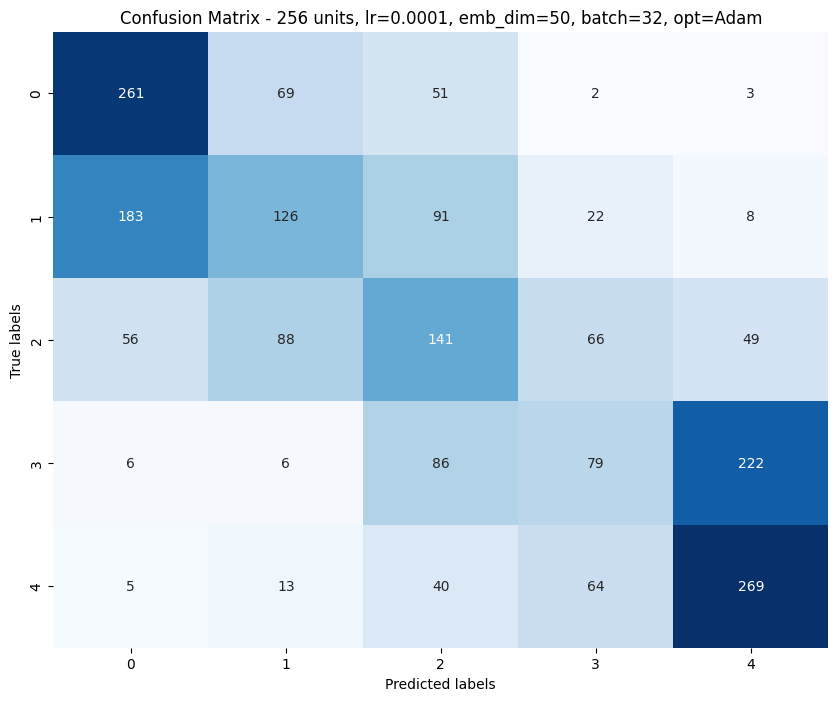

Hyperparameters: 256 units, lr=0.0001, emb_dim=300, batch=32, opt=RMSprop
Classification Report:
              precision    recall  f1-score   support

           0      0.596     0.611     0.604       386
           1      0.443     0.328     0.377       430
           2      0.408     0.475     0.439       400
           3      0.422     0.358     0.388       399
           4      0.565     0.703     0.626       391

    accuracy                          0.491      2006
   macro avg      0.487     0.495     0.487      2006
weighted avg      0.485     0.491     0.484      2006

Confusion Matrix:


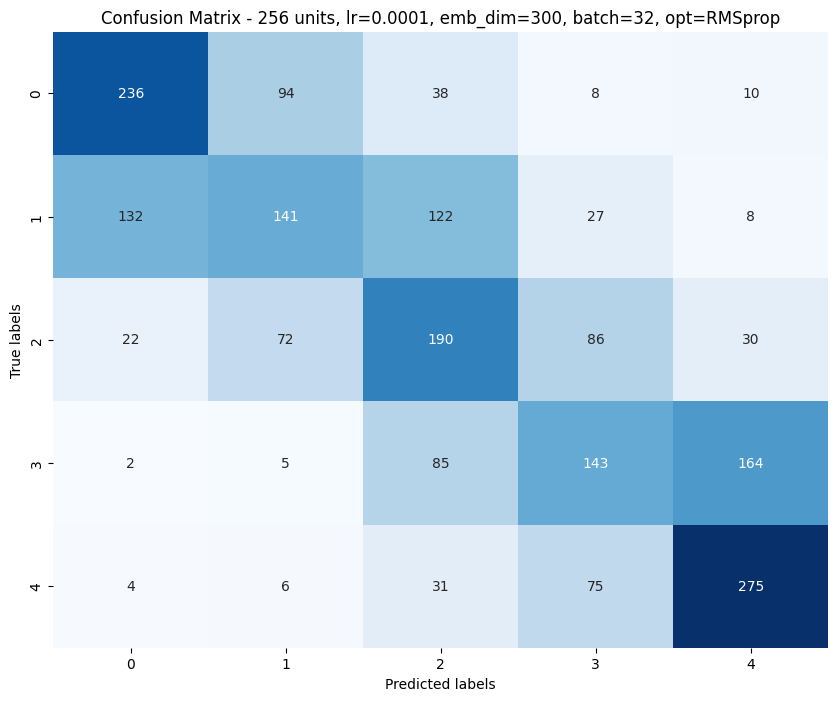

Hyperparameters: 256 units, lr=0.0001, emb_dim=50, batch=32, opt=RMSprop
Classification Report:
              precision    recall  f1-score   support

           0      0.614     0.549     0.580       386
           1      0.462     0.356     0.402       430
           2      0.377     0.510     0.434       400
           3      0.385     0.479     0.427       399
           4      0.621     0.465     0.532       391

    accuracy                          0.470      2006
   macro avg      0.492     0.472     0.475      2006
weighted avg      0.490     0.470     0.473      2006

Confusion Matrix:


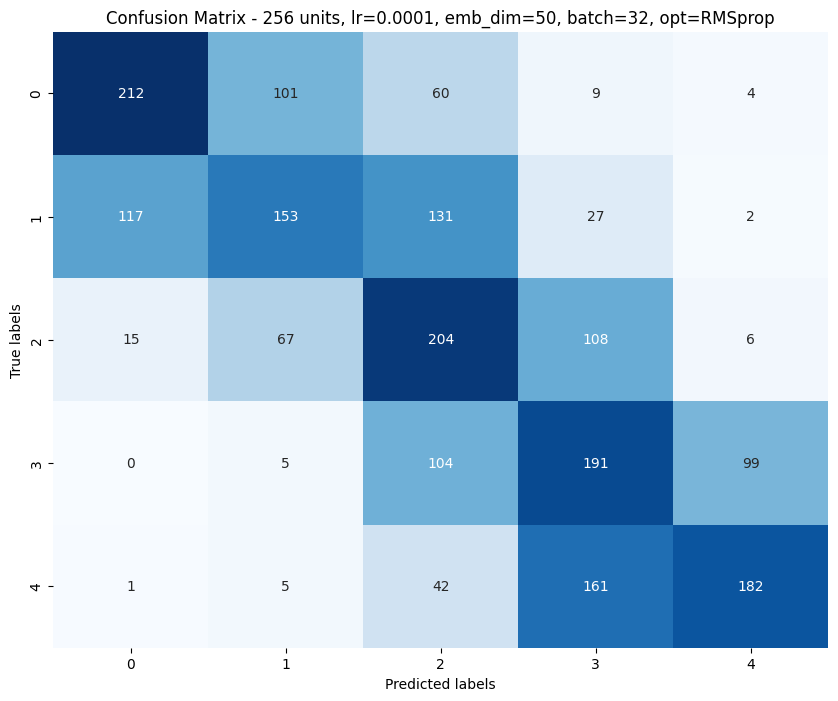

In [ ]:
def plot_model_performance_separate(histories, labels):
    for history, label in zip(histories, labels):
        plt.figure(figsize=(14, 7))

        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'o-', label=f'Training loss ({label})')
        plt.plot(epochs, val_loss, 'o--', label=f'Validation loss ({label})')

        plt.title(f'Training and validation loss - {label}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

plot_model_performance_separate(
    histories=[result[0] for result in results],
    labels=[result[3] for result in results]
)

for history, class_report, conf_matrix, label in results:
    print(f'Hyperparameters: {label}')
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {label}')
    plt.show()

# Task D

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dropout, Dense
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
import torch
from torchtext.vocab import GloVe

In [ ]:
glove_embeddings = GloVe(name='6B', dim=300)
vocab_size = len(tokenizer.word_index) + 1

.vector_cache/glove.6B.zip: 862MB [02:40, 5.36MB/s]                           
100%|█████████▉| 399999/400000 [00:59<00:00, 6769.55it/s]


In [ ]:
def create_embedding_matrix(word_index, glove_embeddings, vocab_size, embedding_dim):
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for word, i in word_index.items():
        if i < vocab_size:
            try:
                embedding_vector = glove_embeddings[word]
                embedding_matrix[i] = embedding_vector
            except KeyError:
                pass
    return embedding_matrix

In [ ]:
embedding_dim = 300
embedding_matrix = create_embedding_matrix(tokenizer.word_index, glove_embeddings, vocab_size, embedding_dim)

def build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type, embedding_matrix):
    model = Sequential()
    model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, weights=[embedding_matrix], input_length=max_sequence_length, trainable=False))
    model.add(SimpleRNN(units=rnn_units, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(5, activation='softmax'))

    optimizer = optimizer_type(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), verbose=2, callbacks=[early_stop])

    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_val_classes = np.argmax(y_val, axis=1)

    # Evaluation
    class_report = classification_report(y_val_classes, y_pred_classes, digits=3)
    conf_matrix = confusion_matrix(y_val_classes, y_pred_classes)

    return history, class_report, conf_matrix

In [ ]:
hyperparams = [
    (256, 0.0001, 300, 32, RMSprop)
]

In [ ]:
results = []
for rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type in hyperparams:
    history, class_report, conf_matrix = build_and_evaluate_model(rnn_units, learning_rate, embedding_dim, batch_size, optimizer_type, embedding_matrix)
    results.append((history, class_report, conf_matrix, f'{rnn_units} units, lr={learning_rate}, emb_dim={embedding_dim}, batch={batch_size}, opt={optimizer_type.__name__}'))

Epoch 1/100
251/251 - 44s - loss: 1.6892 - accuracy: 0.2127 - val_loss: 1.6178 - val_accuracy: 0.2218 - 44s/epoch - 174ms/step
Epoch 2/100
251/251 - 42s - loss: 1.6240 - accuracy: 0.2506 - val_loss: 1.5894 - val_accuracy: 0.2607 - 42s/epoch - 168ms/step
Epoch 3/100
251/251 - 38s - loss: 1.5643 - accuracy: 0.2882 - val_loss: 1.5571 - val_accuracy: 0.2906 - 38s/epoch - 152ms/step
Epoch 4/100
251/251 - 42s - loss: 1.4859 - accuracy: 0.3330 - val_loss: 1.3968 - val_accuracy: 0.3504 - 42s/epoch - 168ms/step
Epoch 5/100
251/251 - 40s - loss: 1.3367 - accuracy: 0.4064 - val_loss: 1.3089 - val_accuracy: 0.3968 - 40s/epoch - 161ms/step
Epoch 6/100
251/251 - 40s - loss: 1.2609 - accuracy: 0.4337 - val_loss: 1.2801 - val_accuracy: 0.4063 - 40s/epoch - 161ms/step
Epoch 7/100
251/251 - 40s - loss: 1.2191 - accuracy: 0.4504 - val_loss: 1.2454 - val_accuracy: 0.4172 - 40s/epoch - 157ms/step
Epoch 8/100
251/251 - 40s - loss: 1.1797 - accuracy: 0.4767 - val_loss: 1.2489 - val_accuracy: 0.4247 - 40s/epo

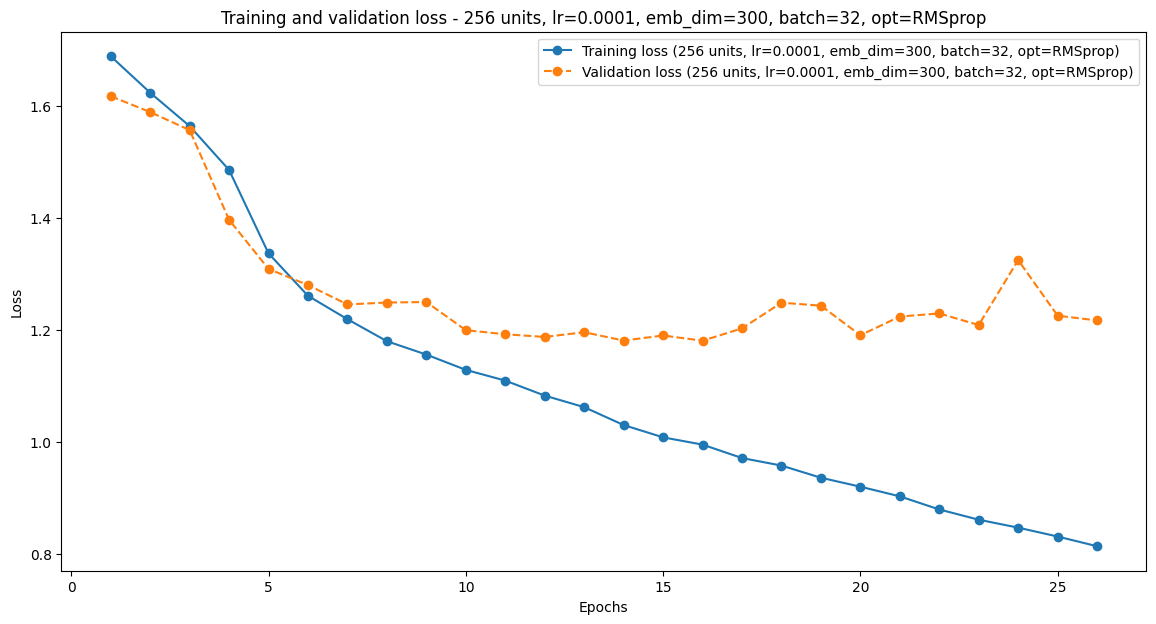

Hyperparameters: 256 units, lr=0.0001, emb_dim=300, batch=32, opt=RMSprop
Classification Report:
              precision    recall  f1-score   support

           0      0.572     0.534     0.552       386
           1      0.431     0.458     0.444       430
           2      0.383     0.362     0.372       400
           3      0.406     0.361     0.382       399
           4      0.547     0.637     0.589       391

    accuracy                          0.469      2006
   macro avg      0.468     0.470     0.468      2006
weighted avg      0.466     0.469     0.466      2006

Confusion Matrix:


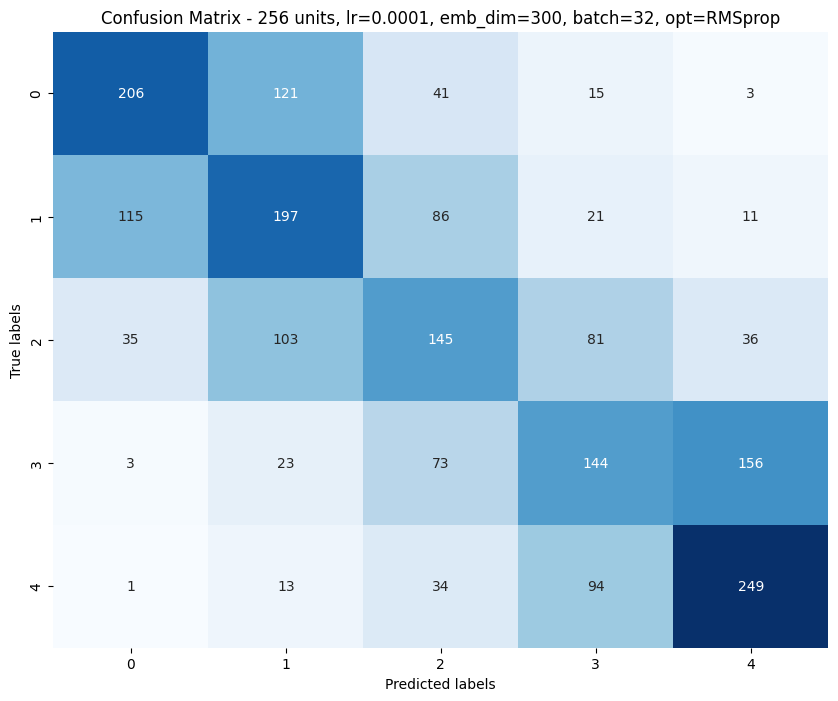

In [ ]:
def plot_model_performance_separate(histories, labels):
    for history, label in zip(histories, labels):
        plt.figure(figsize=(14, 7))

        loss = history.history['loss']
        val_loss = history.history['val_loss']
        epochs = range(1, len(loss) + 1)

        plt.plot(epochs, loss, 'o-', label=f'Training loss ({label})')
        plt.plot(epochs, val_loss, 'o--', label=f'Validation loss ({label})')

        plt.title(f'Training and validation loss - {label}')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

plot_model_performance_separate(
    histories=[result[0] for result in results],
    labels=[result[3] for result in results]
)

for history, class_report, conf_matrix, label in results:
    print(f'Hyperparameters: {label}')
    print("Classification Report:")
    print(class_report)
    print("Confusion Matrix:")

    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {label}')
    plt.show()